<a href="https://colab.research.google.com/github/ali-talebi/DeepLearning/blob/main/sin_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np 
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense , Dropout , BatchNormalization 
import matplotlib.pyplot as plt  
from tensorflow.keras.optimizers import Adam , SGD 
from sklearn.metrics import mean_squared_error 

In [7]:
x = np.linspace(-3 * np.pi , 3 *np.pi , 1000 ) 
y = np.sin(x)

In [11]:
from sklearn.model_selection import train_test_split  

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y  , test_size  = 0.2 , random_state = 42 )

In [15]:
x_train = x_train.reshape(-1 , 1 )
x_test = x_test.reshape(-1 ,1 )
y_train = y_train.reshape(-1 ,1 )
y_test = y_test.reshape(-1 ,1 )

In [38]:
model = Sequential([
                    Dense(128, activation='tanh' , input_shape = x_train.shape[1:] ) , 
                    BatchNormalization() , 
                    Dropout(0.2) , 
                    Dense(100 , activation = 'tanh' ) ,
                    BatchNormalization() ,  
                    Dropout(0.2) , 
                    Dense(50 , activation = 'tanh' ) ,
                    BatchNormalization() , 
                    Dropout(0.2) ,  
                    Dense(20 , activation = 'tanh' ) , 
                    BatchNormalization() , 
                    Dropout(0.2) ,
                    Dense(10 , activation = 'tanh' ) , 
                    Dropout(0.2) ,
                    Dense(1 , activation = 'tanh' )
])

In [39]:
model.compile(optimizer=Adam(learning_rate = 0.002 , decay = 0.002 / 25 ) , loss = 'mse' , metrics='mse' )

In [40]:
alis = model.fit(x_train , y_train , epochs = 1000 , batch_size = 50 , validation_split= 0.2 )

Epoch 1/1000
13/13 [==============================] - 2s 24ms/step - loss: 0.7319 - mse: 0.7319 - val_loss: 0.5866 - val_mse: 0.5866
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6825 - mse: 0.6825 - val_loss: 0.5743 - val_mse: 0.5743
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.6865 - mse: 0.6865 - val_loss: 0.4751 - val_mse: 0.4751
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6022 - mse: 0.6022 - val_loss: 0.4891 - val_mse: 0.4891
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.6377 - mse: 0.6377 - val_loss: 0.5479 - val_mse: 0.5479
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.5190 - val_mse: 0.5190
Epoch 7/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.5549 - val_mse: 0.5549
Epoch 8/1000
13/13 [==============================] - 0s 8ms/step - loss: 0

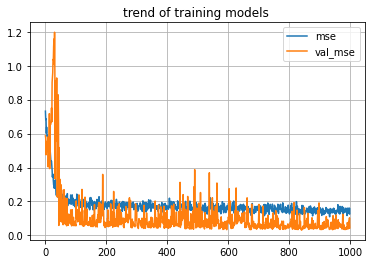

In [41]:
plt.plot(range(1000) , alis.history['mse'] , label = 'mse' )
plt.plot(range(1000) , alis.history['val_mse'] , label = 'val_mse' ) 
plt.legend()
plt.grid()
plt.title('trend of training models ')
plt.show()

In [42]:
y_pre = model.predict(x_test)

In [43]:
print(f"mean squared error is : {mean_squared_error(y_pre , y_test )}")

mean squared error is : 0.04815387245507456


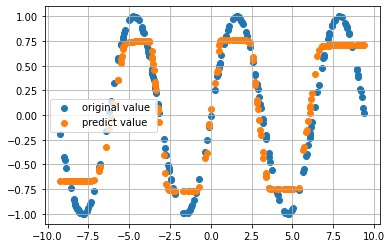

In [44]:
plt.scatter(x_test , y_test , label = 'original value ') 
plt.scatter(x_test , y_pre , label = 'predict value ')
plt.legend()
plt.grid()
plt.show()


In [57]:
x_valid = [np.pi / 6 ]
x_valid = np.array(x_valid)
x_valid = x_valid.reshape(-1 ,1 )
print(f'original sin value of {x_valid} is : [{np.sin(x_valid)}] and   predict value is : {model.predict(x_valid)}')

original sin value of [[0.52359878]] is : [[[0.5]]] and   predict value is : [[0.7166262]]
